In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import joblib

data = pd.read_csv('train.csv')

In [ ]:
X = data[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
          'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
len(data['pc'].unique())

21

In [ ]:
len(data['ram'].unique())

1562

In [ ]:
data['cluster'] = clusters

print(data['cluster'].value_counts())

cluster
13    134
12    118
19    110
4     110
0     109
16    109
2     106
10    105
11    105
14     99
6      99
9      98
15     96
3      96
8      92
1      87
5      86
18     84
7      81
17     76
Name: count, dtype: int64


In [ ]:
data['cluster'] = kmeans.labels_

output_dir = 'cluster_csv'
os.makedirs(output_dir, exist_ok=True)

for cluster_label in range(kmeans.n_clusters):
    cluster_data = data[data['cluster'] == cluster_label]
    cluster_filename = os.path.join(output_dir, f'cluster_{cluster_label}.csv')
    cluster_data.to_csv(cluster_filename, index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

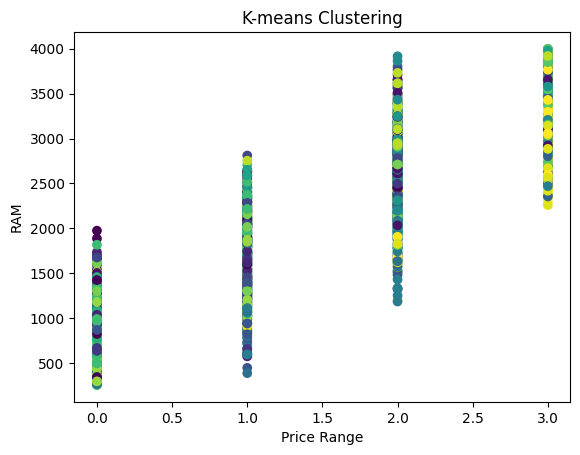

In [ ]:
plt.scatter(data['price_range'], data['ram'], c=clusters, cmap='viridis')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('K-means Clustering')
plt.show()

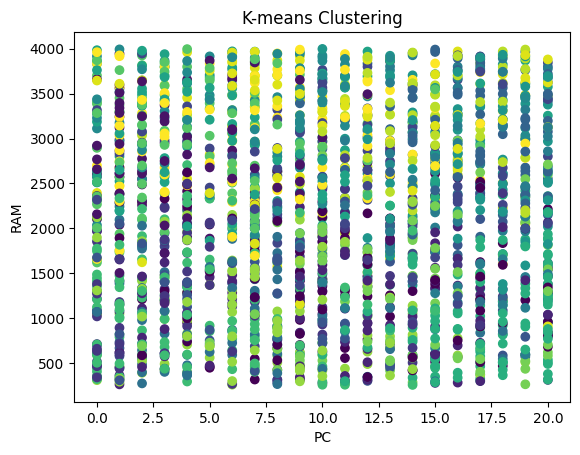

In [ ]:
plt.scatter(data['pc'], data['ram'], c=clusters, cmap='viridis')
plt.xlabel('PC')
plt.ylabel('RAM')
plt.title('K-means Clustering')
plt.show()

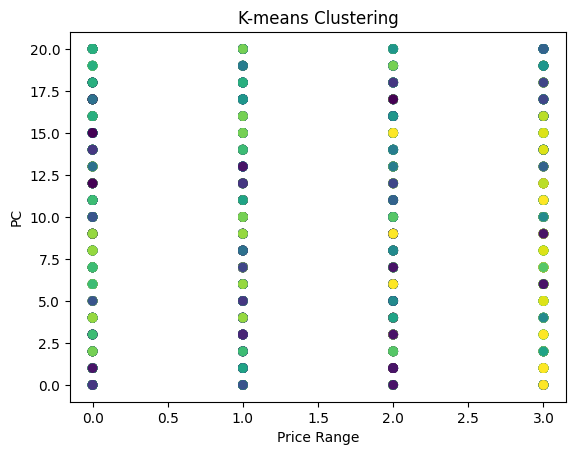

In [ ]:
plt.scatter(data['price_range'], data['pc'], c=clusters, cmap='viridis')
plt.xlabel('Price Range')
plt.ylabel('PC')
plt.title('K-means Clustering')
plt.show()

In [ ]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']